In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.3MB/s 
     |████████████████████████████████| 9.5MB 21.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/sample_data/milk_production.csv', index_col='date', parse_dates=["date"])
df=df.asfreq('MS')

In [ ]:
df.head()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df['pounds_per_cow'])
fig=decomp.plot()


In [ ]:
from pmdarima import auto_arima

ARIMA

In [ ]:
auto_arima=auto_arima(df,trace=True)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df,order=(2,1,5))
model_fit=model.fit()
model_fit.summary()

In [ ]:
ypred=model_fit.predict()

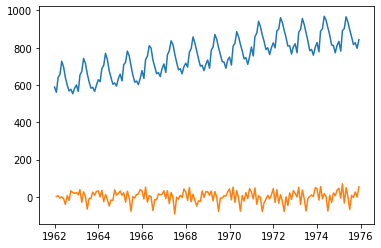

In [ ]:
plt.plot(df)
plt.plot(ypred)

SARIMA

In [ ]:
auto_arima=auto_arima(df,trace=True,seasonal=True,m=12)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(df,order=(2,0,0),seasonal_order=(0,1,1,12)).fit(disp=0)
ypred=model.predict()
plt.plot(df)
plt.plot(ypred)

Function for trying multipe orders on SARIMAX

In [ ]:
def checkParameters(params):
  result=pd.DataFrame(columns=["Parameter","AIC"])
  par=[]
  maic=[]
  for i in params:
    #SARIMAX(order=(p,q,d),seasonal_order=(P,D,Q,m))
    model=SARIMAX(df,order=(i[0],d,i[1]),seasonal_order=(i[2],D,i[3],m)).fit(disp=0)
    par.append(i)
    maic=model.aic
  result["Parameter"]=par
  result["AIC"]=maic
  return result



In [ ]:
from itertools import product
p=range(0,5,1)
d=1
q=range(0,5,1)
P=range(0,5,1)
D=1
Q=range(0,5,1)
m=12
pr=product(p,q,P,Q)


In [ ]:
checkParameters(pr)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packa